# 
In this algorithm, decision trees are created in sequential form. Weights play an important role in XGBoost. Weights are 
assigned to all the independent variables which are then fed into the decision tree which predicts results. Weight of variables 
predicted wrong by the tree is increased and these the variables are then fed to the second decision tree. These individual 
classifiers/predictors then ensemble to give a strong and more precise model. It can work on regression, classification, 
ranking, and user-defined prediction problems.

The library is laser-focused on computational speed and model performance, as such, there are few frills.

Three main forms of gradient boosting are supported: Gradient Boosting, Stochastic Gradient Boosting,Regularized Gradient Boosting.
    
System Features, For use of a range of computing environments this library provides-
Parallelization of tree construction
Distributed Computing for training very large models
Cache Optimization of data structures and algorithm

In [1]:
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import io

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


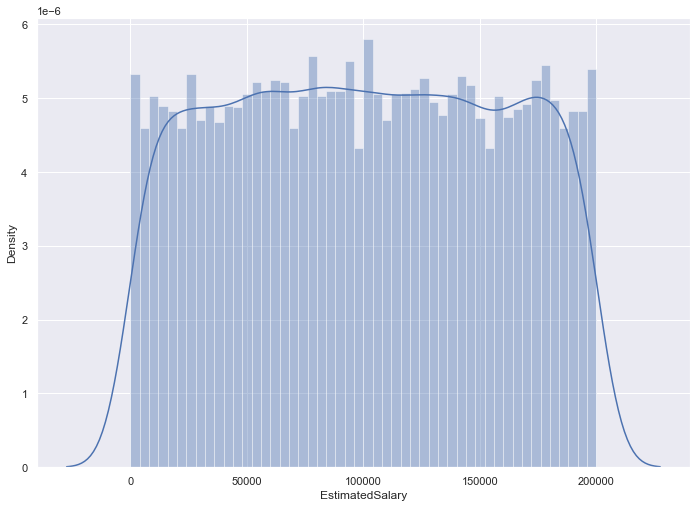

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(dataset['EstimatedSalary'], bins=50)
plt.show()

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


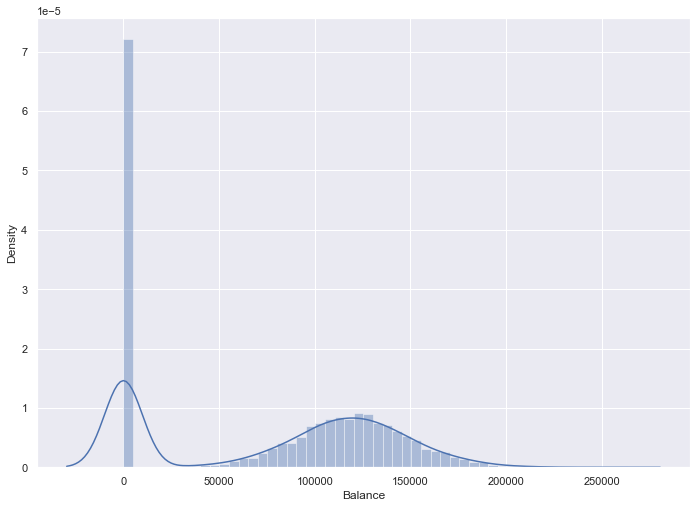

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(dataset['Balance'], bins=50)
plt.show()

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


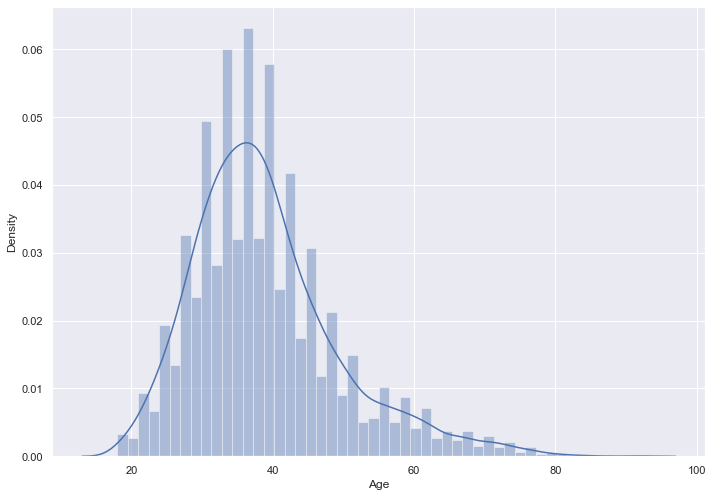

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(dataset['Age'], bins=50)
plt.show()

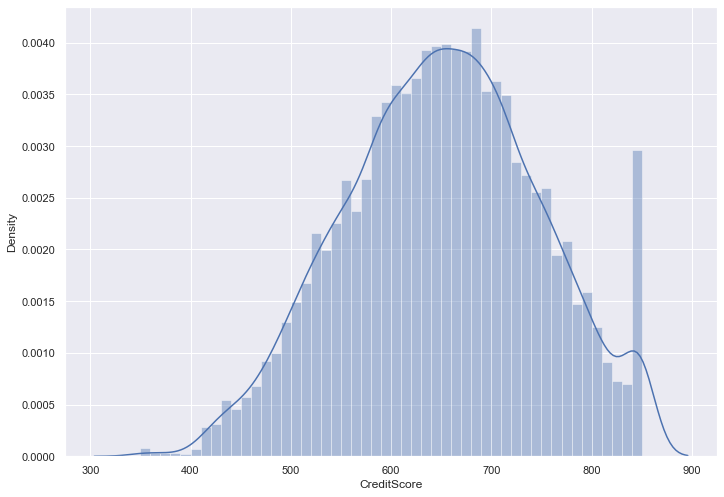

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(dataset['CreditScore'], bins=50)
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

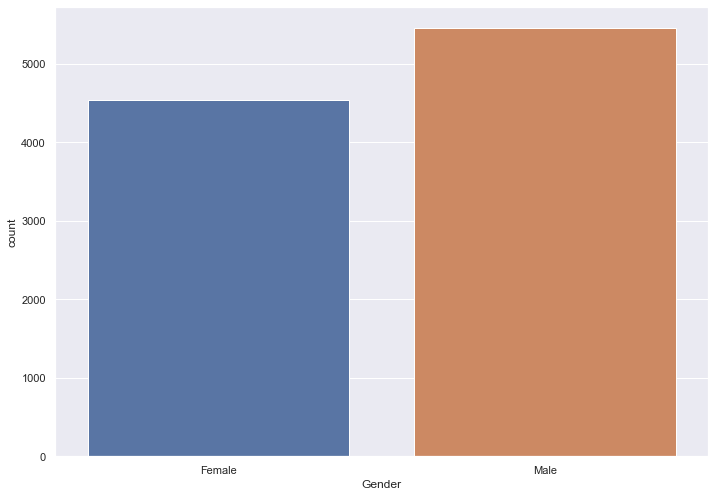

In [20]:
sns.countplot(x = dataset.Gender)

<AxesSubplot:xlabel='Exited', ylabel='count'>

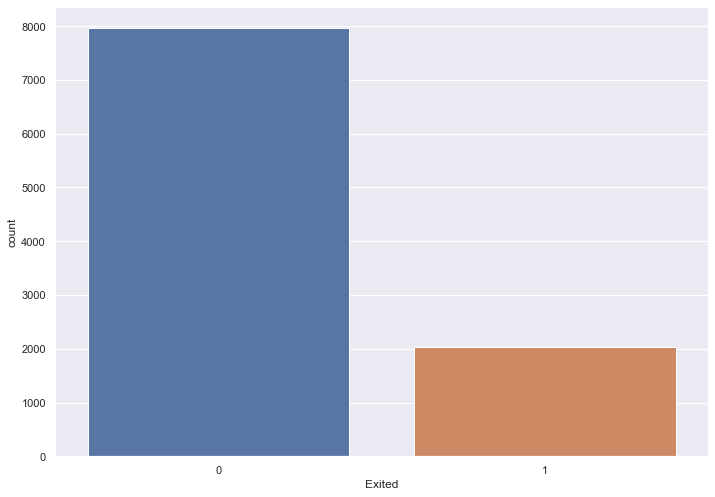

In [21]:
sns.countplot(x = dataset.Exited)

<AxesSubplot:xlabel='Gender', ylabel='count'>

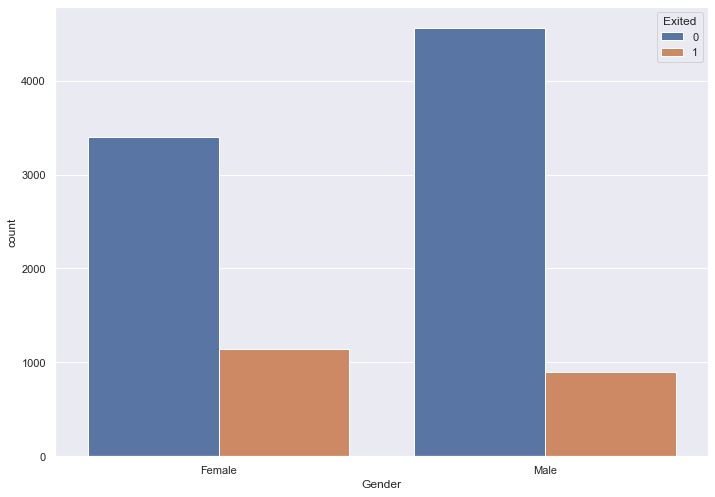

In [23]:
sns.countplot(hue = dataset.Exited, x = dataset.Gender)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

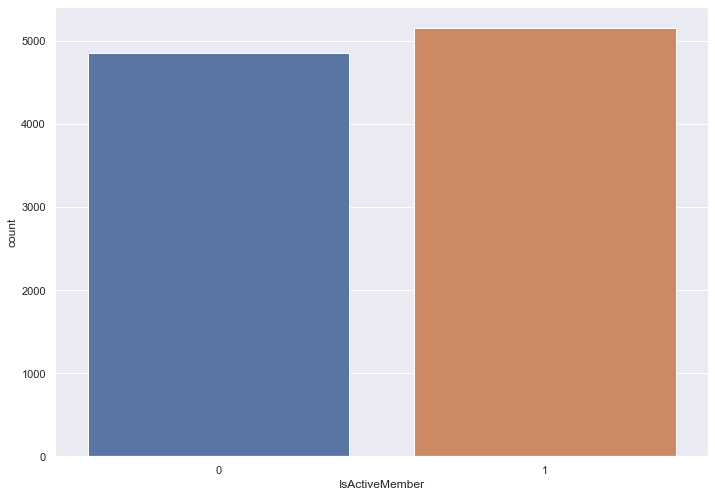

In [25]:
sns.countplot(x=dataset.IsActiveMember)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

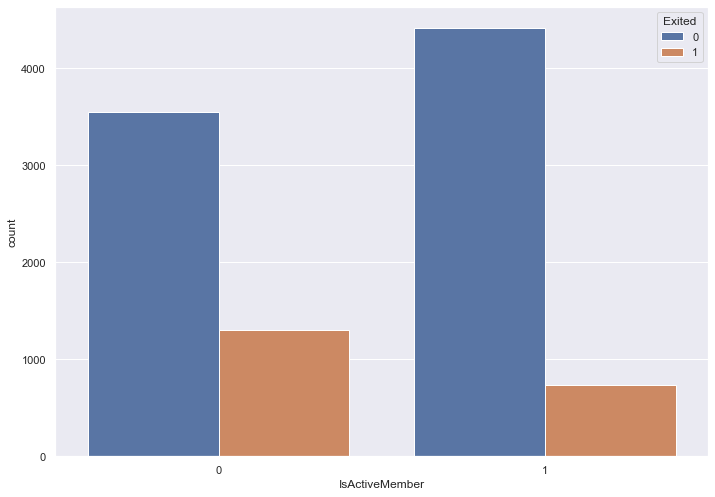

In [26]:
sns.countplot(hue = dataset.Exited, x = dataset.IsActiveMember)

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

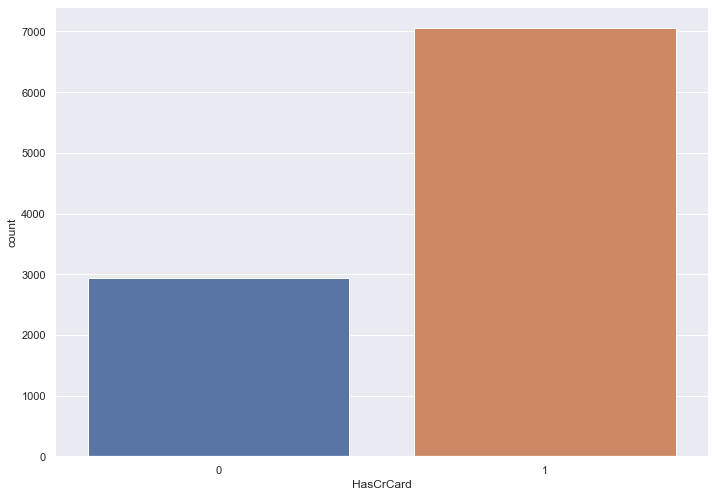

In [28]:
sns.countplot(x = dataset.HasCrCard)

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

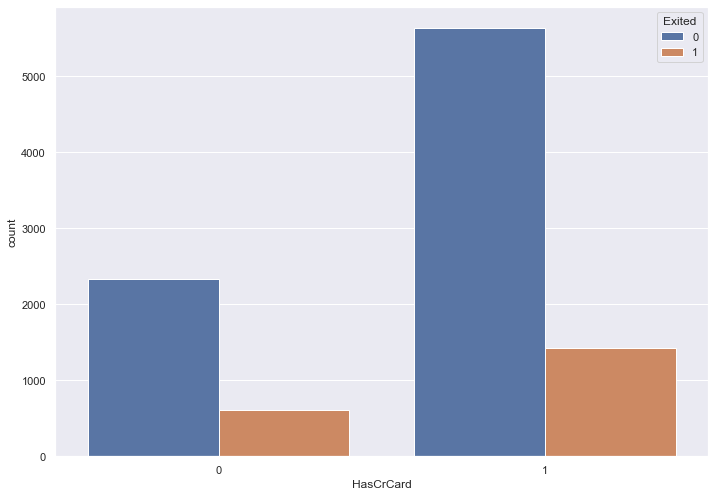

In [31]:
sns.countplot(hue = dataset.Exited, x = dataset.HasCrCard)

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

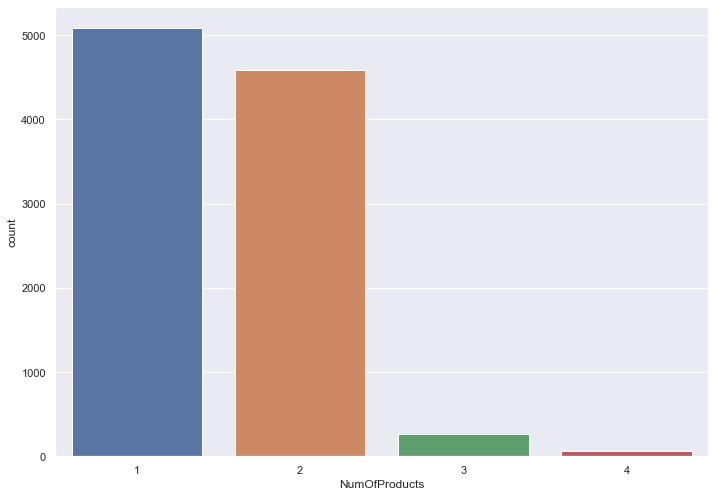

In [32]:
sns.countplot(x = dataset.NumOfProducts)

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

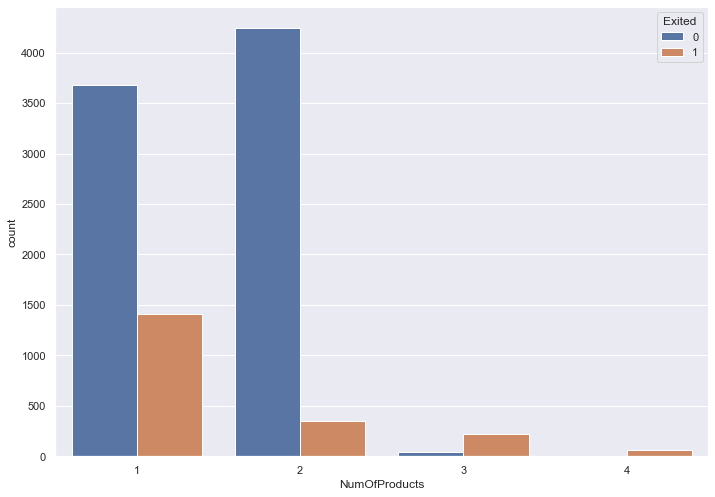

In [33]:
sns.countplot(hue = dataset.Exited, x = dataset.NumOfProducts)

<AxesSubplot:xlabel='Tenure', ylabel='count'>

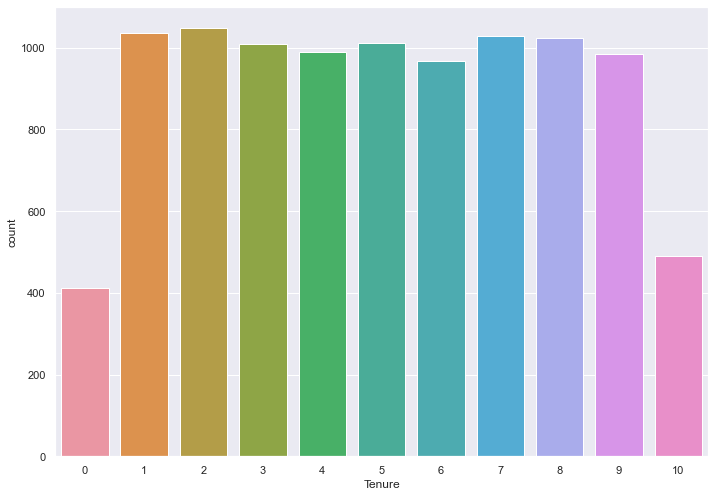

In [36]:
sns.countplot(x = dataset.Tenure)

<AxesSubplot:xlabel='Tenure', ylabel='count'>

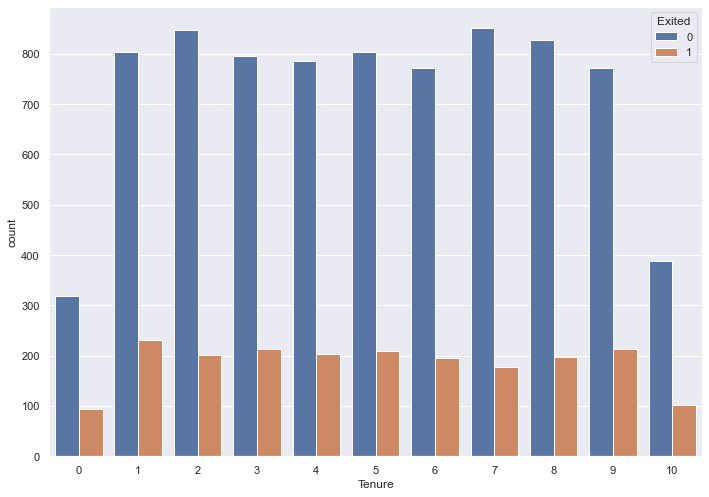

In [37]:
sns.countplot(hue = dataset.Exited, x = dataset.Tenure)

<AxesSubplot:xlabel='Geography', ylabel='count'>

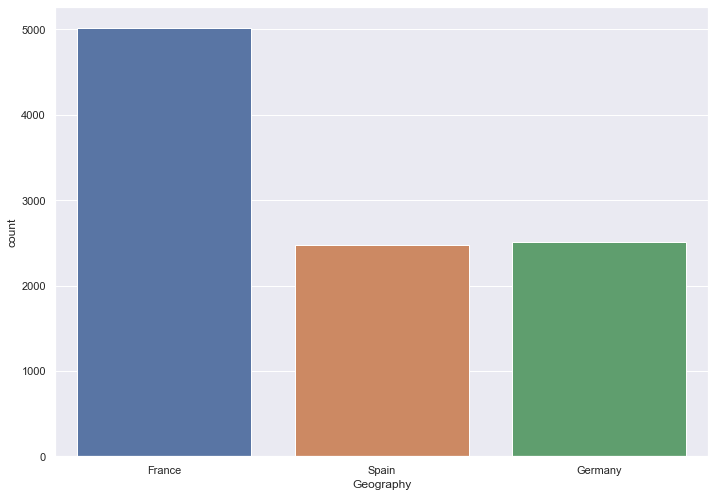

In [38]:
sns.countplot(x = dataset.Geography)

<AxesSubplot:xlabel='Geography', ylabel='count'>

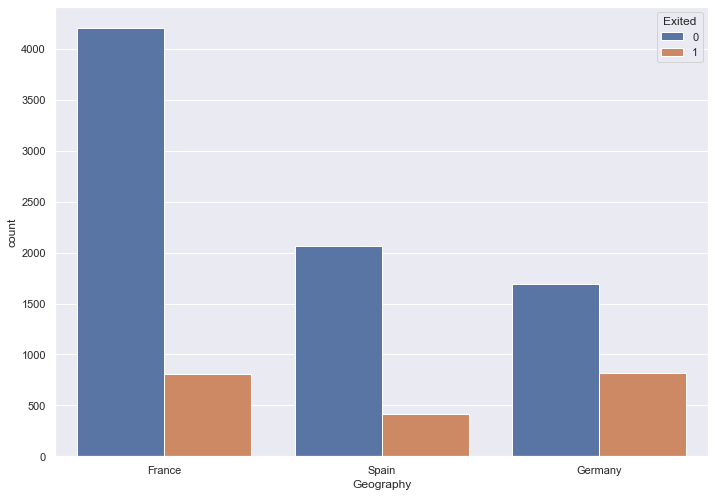

In [39]:
sns.countplot(hue = dataset.Exited, x = dataset.Geography)

In [40]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:>

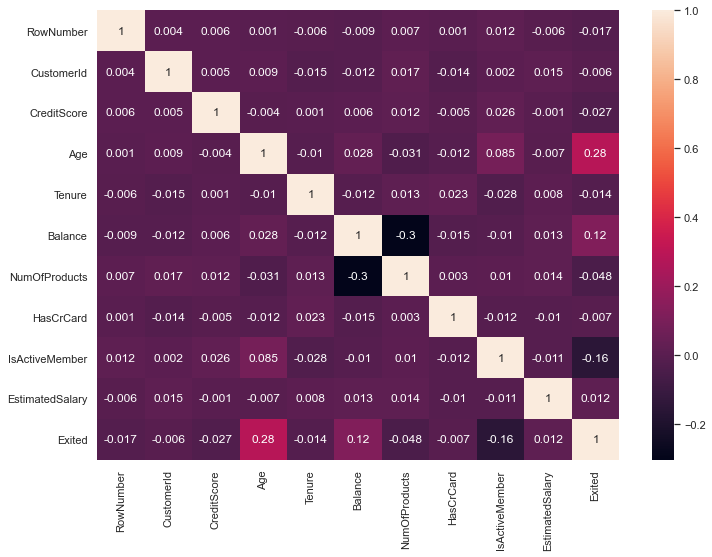

In [47]:
correlation_matrix = dataset.corr().round(3)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

# 
The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive 
correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.


In [50]:
dataset = dataset.drop(['RowNumber','CustomerId','Surname'],axis = 1)

In [51]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [52]:
Y = dataset.Exited

In [65]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [54]:
X = dataset.drop('Exited',axis=1)

In [58]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [56]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [59]:
location = pd.get_dummies(X['Geography'], prefix = "Geography")

In [60]:
location

,Geography_France,Geography_Germany,Geography_Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [61]:
sex = pd.get_dummies(dataset['Gender'], prefix = "Gender")

In [62]:
sex

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [63]:
X = pd.concat([X,location,sex],axis=1)

In [64]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [66]:
X = X.drop(['Geography','Gender'],axis=1)

In [67]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [68]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [69]:
my_model = xg.XGBClassifier()

In [70]:
my_model.fit(x_train, y_train)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:45:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
y_pred = my_model.predict(x_test)

In [74]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [76]:
cm

array([[2275,  101],
       [ 321,  303]], dtype=int64)

In [ ]:
#Precision Score =        2275/(2275+321)       = 
#Recall Score =           2275/(2275+101)       = 
#Accuracy Score =         (2275+303)/(2275+303+321+101)    = 
#F1-Score =               2*Precision Score*Recall Score/(Precision Score+Recall Score)    = 
#misclassification rate = (321+101)/(2275+303+321+101)    = 

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2376
           1       0.75      0.49      0.59       624

    accuracy                           0.86      3000
   macro avg       0.81      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8593333333333333

In [80]:
my_model.predict_proba(x_test)

array([[0.8420966 , 0.15790339],
       [0.9276602 , 0.07233976],
       [0.96624464, 0.03375536],
       ...,
       [0.9601743 , 0.03982569],
       [0.9913359 , 0.00866409],
       [0.8905863 , 0.10941366]], dtype=float32)